In [1]:
!pip install xlrd==1.2.0


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install squarify


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install -q kaggle


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#!/bin/bash
!kaggle datasets download olistbr/brazilian-ecommerce

In [5]:
!unzip brazilian-ecommerce.zip -d /content/data/

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [7]:
# Reading data from all tables in the dataset

customers_df = pd.read_csv('./data/olist_customers_dataset.csv')
items_df = pd.read_csv('./data/olist_order_items_dataset.csv')
products_df = pd.read_csv('./data/olist_products_dataset.csv')
category_translation_df = pd.read_csv('./data/product_category_name_translation.csv')
orders_df = pd.read_csv('./data/olist_orders_dataset.csv')
payments_df = pd.read_csv('./data/olist_order_payments_dataset.csv')

In [8]:
import pandas as pd

# List of DataFrames and their corresponding names
csv_files = {
    "customers": customers_df,
    "items": items_df,
    "products": products_df,
    "category_translation": category_translation_df,
    "orders": orders_df,
    "payments": payments_df,
}

# Function to check null values in each DataFrame
def check_null_values_in_csv(csv_files):
    for name, df in csv_files.items():
        if df is not None and not df.empty:
            print(f"Null values in '{name}':")
            null_counts = df.isnull().sum()
            null_percentage = (null_counts / df.shape[0]) * 100
            null_summary = pd.DataFrame({
                "Null Count": null_counts,
                "Percentage": null_percentage
            })
            print(null_summary)
        else:
            print(f"DataFrame '{name}' is either not loaded or empty.")
        print("-" * 50)

# Call the function
check_null_values_in_csv(csv_files)



Null values in 'customers':
                          Null Count  Percentage
customer_id                        0         0.0
customer_unique_id                 0         0.0
customer_zip_code_prefix           0         0.0
customer_city                      0         0.0
customer_state                     0         0.0
--------------------------------------------------
Null values in 'items':
                     Null Count  Percentage
order_id                      0         0.0
order_item_id                 0         0.0
product_id                    0         0.0
seller_id                     0         0.0
shipping_limit_date           0         0.0
price                         0         0.0
freight_value                 0         0.0
--------------------------------------------------
Null values in 'products':
                            Null Count  Percentage
product_id                           0    0.000000
product_category_name              610    1.851234
product_name_lenght 

In [9]:
# Handling null values in the products table
def handle_nulls_in_products(products_df):
    # Display the null values before handling
    print("Null values before handling:")
    print(products_df.isnull().sum())
    print("-" * 50)
    
    # Example strategies for handling null values
    # 1. Filling numeric null columns with the median
    numeric_columns = products_df.select_dtypes(include=['float64', 'int64']).columns
    products_df[numeric_columns] = products_df[numeric_columns].fillna(products_df[numeric_columns].median())

    # 2. Filling categorical null  columns with the mode (most frequent value)
    categorical_columns = products_df.select_dtypes(include=['object']).columns
    products_df[categorical_columns] = products_df[categorical_columns].fillna(products_df[categorical_columns].mode().iloc[0])
    
    # Display the null values after handling
    print("Null values after handling:")
    print(products_df.isnull().sum())
    print("-" * 50)
    
    return products_df

# Apply the function to handle nulls in products_df
products_df = handle_nulls_in_products(products_df)


Null values before handling:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
--------------------------------------------------
Null values after handling:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
--------------------------------------------------


In [10]:
def handle_nulls_in_orders_with_output(orders_df):
    # Display null values before handling
    print("Null values before handling:")
    print(orders_df.isnull().sum())
    print("-" * 50)
    
    # Handling null values
    # Fill missing date-related columns with placeholder values
    import datetime as dt
    placeholder_date_approved = dt.datetime(2017, 11, 24)
    placeholder_date_carrier = dt.datetime(2017, 11, 24)
    placeholder_date_customer = dt.datetime(2017, 11, 24)

    orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(placeholder_date_approved)
    orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(placeholder_date_carrier)
    orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(placeholder_date_customer)
    
    # If there are any other columns requiring specific handling, add them here.
    # For example, filling unknown `order_status` with a default value
    orders_df['order_status'] = orders_df['order_status'].fillna('unknown')

    # Display null values after handling
    print("Null values after handling:")
    print(orders_df.isnull().sum())
    print("-" * 50)
    
    return orders_df

# Apply the function to handle nulls in orders_df
orders_df = handle_nulls_in_orders_with_output(orders_df)


Null values before handling:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
--------------------------------------------------
Null values after handling:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
--------------------------------------------------


In [11]:
# Merging all dataframes
merged_df = orders_df.merge(items_df, on='order_id')
merged_df = merged_df.merge(payments_df, on='order_id')
merged_df = merged_df.merge(products_df, on='product_id')
merged_df = merged_df.merge(customers_df, on='customer_id')
merged_df = merged_df.merge(category_translation_df, on='product_category_name')

In [12]:
merged_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00              1   
1           2017-10-18 00:00:00              1   
2           2017-10-18 00:00:00              1   
3           2018-08-13 00:00:00              1   
4           2018-09-04 00:00:00              1   

                         product_id  ... product_photos_qty product_weight_g  \
0  87285b34884572647811a353c7ac498a  ...                4.0            500.0   
1  87285b34884572647811a353c7ac498a  ...                4.0            500.0   
2  87285b34884572647811a353c7ac498a  ...                4.0            500.0   
3  595fac2a385ac33a80bd5114aec74eb8  ...                1.0            400.0   
4  aa4383b373c6aca5d8797843e5594415  ...                1.0            420.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               19.0                8.0              13.0   
1               19.0                8.0              13.0   
2               19.0                8.0              13.0   
3               19.0               13.0              19.0   
4               24.0               19.0              21.0   

                 customer_unique_id  customer_zip_code_prefix  customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149      sao paulo   
1  7c396fd4830fd04220f754e42b4e5bff                      3149      sao paulo   
2  7c396fd4830fd04220f754e42b4e5bff                      3149      sao paulo   
3  af07308b275d755c9edb36a90c618231                     47813      barreiras   
4  3a653a41f6f9fc3d2a113cf8398680e8                     75265     vianopolis   

  customer_state  product_category_name_english  
0             SP                     housewares  
1             SP                     housewares  
2             SP                     housewares  
3             BA                      perfumery  
4             GO                           auto  

[5 rows x 31 columns]

In [13]:
merged_df.to_excel('merged_df.xlsx',index=False)

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117576 entries, 0 to 117575
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117576 non-null  object 
 1   customer_id                    117576 non-null  object 
 2   order_status                   117576 non-null  object 
 3   order_purchase_timestamp       117576 non-null  object 
 4   order_approved_at              117576 non-null  object 
 5   order_delivered_carrier_date   117576 non-null  object 
 6   order_delivered_customer_date  117576 non-null  object 
 7   order_estimated_delivery_date  117576 non-null  object 
 8   order_item_id                  117576 non-null  int64  
 9   product_id                     117576 non-null  object 
 10  seller_id                      117576 non-null  object 
 11  shipping_limit_date            117576 non-null  object 
 12  price                         

In [15]:
#convert column that relate to date to 1 type - datetime dtype
date_feature=['order_purchase_timestamp','order_approved_at','order_delivered_\
carrier_date','order_delivered_customer_date','order_estimated_delivery_date',\
'shipping_limit_date' ]
for i in date_feature:
  merged_df[i]=pd.to_datetime(merged_df[i],errors ='raise', utc = False)


In [16]:
rfm_df = merged_df[['customer_unique_id', 'order_id','product_category_name_english','price',\
                    'freight_value','payment_type','order_status','order_purchase_timestamp',\
                    'customer_state','payment_value'   ]]
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117576 entries, 0 to 117575
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             117576 non-null  object        
 1   order_id                       117576 non-null  object        
 2   product_category_name_english  117576 non-null  object        
 3   price                          117576 non-null  float64       
 4   freight_value                  117576 non-null  float64       
 5   payment_type                   117576 non-null  object        
 6   order_status                   117576 non-null  object        
 7   order_purchase_timestamp       117576 non-null  datetime64[ns]
 8   customer_state                 117576 non-null  object        
 9   payment_value                  117576 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 9.0+ MB


In [17]:
rfm_df=rfm_df[rfm_df['order_status'] =='delivered']

In [18]:
rfm_df.to_excel('rfm_df.xlsx',index=False)

In [19]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115012 entries, 0 to 117575
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             115012 non-null  object        
 1   order_id                       115012 non-null  object        
 2   product_category_name_english  115012 non-null  object        
 3   price                          115012 non-null  float64       
 4   freight_value                  115012 non-null  float64       
 5   payment_type                   115012 non-null  object        
 6   order_status                   115012 non-null  object        
 7   order_purchase_timestamp       115012 non-null  datetime64[ns]
 8   customer_state                 115012 non-null  object        
 9   payment_value                  115012 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 9.7+ MB


#EDA

In [20]:
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import pydotplus         as pdp
import scipy.stats       as st
import seaborn           as sbn
import plotly.express    as px
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

from IPython.display         import Image
from sklearn                 import linear_model, svm, tree
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score, mean_squared_error, precision_score, f1_score, recall_score#, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes     import BernoulliNB, GaussianNB
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from scipy.cluster          import hierarchy
from scipy.spatial.distance import cdist
from sklearn.cluster        import KMeans, AgglomerativeClustering
from sklearn.preprocessing  import MinMaxScaler, StandardScaler

import statsmodels.api   as sm
from statsmodels.formula.api     import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import scipy.stats as stats

In [21]:
prod_gb1 = rfm_df.groupby(by = ['order_id'])['price'].count().reset_index()

In [22]:
prod_gb1.columns = ['order_id', 'Prod Quantity']

In [23]:
display(prod_gb1.sort_values(by = 'Prod Quantity', ascending = False))

order_id  Prod Quantity
51569  895ab968e7bb0d5659d16cd74cd1650c             63
96044  fedcd9f7ccdc8cba3a18defedd1a5547             38
77235  ccf804e764ed5650cd8759557269dc13             26
74742  c6492b842ac190db807c15aff21a7dd6             24
61266  a3725dfe487d359b5be08cac48b64ec5             24
...                                 ...            ...
96421  ffe73fc1d73e03fdb50e63903ddfe882              1
96422  ffe8851012fcdaf83de7b595fd5154b3              1
96423  ffea20c7630343a6cd9e09858c1295cd              1
96424  ffea406a848c8afe4dec22bf6290ba00              1
96457  fffe41c64501cc87c801fd61db3f6244              1

[96458 rows x 2 columns]

In [24]:
prod_gb2 = pd.DataFrame(rfm_df.groupby(["order_id"], as_index = False).agg({"price":"nunique"}))

In [25]:
prod_gb2.columns = ['order_id', 'Unique Prod']

In [26]:
display(prod_gb2.sort_values(by = 'Unique Prod', ascending = False))

order_id  Unique Prod
76196  ca3625898fbd48669d50701aba51cd5f            7
33940  5a3b1c29a49756e75f1ef513383c0c12            6
78199  cf5c8d9f52807cb2d2f0a0ff54c478da            6
10602  1c11d0f4353b31ac3417fbfa5f0f2a8a            5
45088  77df84f9195be22a4e9cb72ca9e8b4c2            5
...                                 ...          ...
96421  ffe73fc1d73e03fdb50e63903ddfe882            1
96422  ffe8851012fcdaf83de7b595fd5154b3            1
96423  ffea20c7630343a6cd9e09858c1295cd            1
96424  ffea406a848c8afe4dec22bf6290ba00            1
96457  fffe41c64501cc87c801fd61db3f6244            1

[96458 rows x 2 columns]

In [27]:
result1 = pd.merge(prod_gb1, prod_gb2, on = 'order_id')

In [28]:
display(result1)

order_id  Prod Quantity  Unique Prod
0      00010242fe8c5a6d1ba2dd792cb16214              1            1
1      00018f77f2f0320c557190d7a144bdd3              1            1
2      000229ec398224ef6ca0657da4fc703e              1            1
3      00024acbcdf0a6daa1e931b038114c75              1            1
4      00042b26cf59d7ce69dfabb4e55b4fd9              1            1
...                                 ...            ...          ...
96453  fffc94f6ce00a00581880bf54a75a037              1            1
96454  fffcd46ef2263f404302a634eb57f7eb              1            1
96455  fffce4705a9662cd70adb13d4a31832d              1            1
96456  fffe18544ffabc95dfada21779c9644f              1            1
96457  fffe41c64501cc87c801fd61db3f6244              1            1

[96458 rows x 3 columns]

In [29]:
display(result1.sort_values(by = 'Prod Quantity', ascending = False).head(10))

order_id  Prod Quantity  Unique Prod
51569  895ab968e7bb0d5659d16cd74cd1650c             63            2
96044  fedcd9f7ccdc8cba3a18defedd1a5547             38            1
77235  ccf804e764ed5650cd8759557269dc13             26            1
74742  c6492b842ac190db807c15aff21a7dd6             24            1
61266  a3725dfe487d359b5be08cac48b64ec5             24            1
39401  68986e4324f6a21481df4e6e89abcf01             24            2
26513  465c2e1bee4561cb39e0db8c5993aafc             24            1
15126  285c2e15bebd4ac83635ccc563dc71f4             22            1
49021  8272b63d03f5f79c56e9e4120aec44ef             21            2
10602  1c11d0f4353b31ac3417fbfa5f0f2a8a             21            5

In [30]:
prod_tb1 = pd.DataFrame(index=sorted(result1['Prod Quantity'].unique().tolist()))
prod_tb1['NumofProd'] = prod_tb1.index
prod_gb11 = result1.groupby('Prod Quantity')['Prod Quantity'].count()
prod_tb1['Amount'] = prod_gb11

In [31]:
display(prod_tb1)

NumofProd  Amount
1           1   84227
2           2    9251
3           3    1545
4           4     766
5           5     239
6           6     263
7           7      47
8           8      32
9           9      11
10         10      14
11         11      12
12         12      20
13         13       4
14         14       5
15         15       6
16         16       1
19         19       1
20         20       3
21         21       3
22         22       1
24         24       4
26         26       1
38         38       1
63         63       1

In [32]:
prod_tb2 = pd.DataFrame(index=sorted(result1['Unique Prod'].unique().tolist()))
prod_tb2['NumofProd'] = prod_tb2.index
prod_gb11 = result1.groupby('Unique Prod')['Unique Prod'].count()
prod_tb2['Amount'] = prod_gb11

In [33]:
display(prod_tb2)

NumofProd  Amount
1          1   94093
2          2    2187
3          3     154
4          4      17
5          5       4
6          6       2
7          7       1

In [34]:
ord_gb2 = pd.DataFrame(rfm_df.groupby(["customer_unique_id"], as_index = False).agg({"order_id":"nunique"}))

In [35]:
ord_tb1 = pd.DataFrame(index=sorted(ord_gb2.order_id.unique().tolist()))
ord_gb2 = ord_gb2.groupby('order_id')['order_id'].count()
ord_tb1['Amount'] = ord_gb2

In [36]:
display(ord_tb1.sort_values(by = 'Amount', ascending = False))

Amount
1    90537
2     2573
3      181
4       28
5        9
6        5
7        3
9        1
15       1

In [37]:
ord_unique = rfm_df.drop_duplicates(subset=['order_id'], keep='first')

In [38]:
display(ord_unique)

customer_unique_id                          order_id  \
0       7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
3       af07308b275d755c9edb36a90c618231  53cdb2fc8bc7dce0b6741e2150273451   
4       3a653a41f6f9fc3d2a113cf8398680e8  47770eb9100c2d0c44946d9cf07ec65d   
5       7c142cf63193a1473d2e66489a9ae977  949d5b44dbf5de918fe9c16f97b45f8a   
6       72632f0f9dd73dfee390c9b22eb56dd6  ad21c59c0840e6cb83a9ceb5573f8159   
...                                  ...                               ...   
117570  6359f309b166b0196dbf7ad2ac62bb5a  9c5dedf39a927c1b2549525ed64a053c   
117571  da62f9e57a76d978d02ab5362c509660  63943bddc261676b46f01ca7ac2f7bd8   
117572  737520a9aad80b3fbbdad19b66b37b30  83c1379a015df1e13d02aae0204711ab   
117573  5097a5312c8b157bb7be58ae360ef43c  11c177c8e97725db2631073c19f07b62   
117575  60350aa974b26ff12caad89e55993bd6  66dea50a8b16d9b4dee7af250b4be1a5   

       product_category_name_english   price  freight_value payment_type  \
0                         housewares   29.99           8.72  credit_card   
3                          perfumery  118.70          22.76       boleto   
4                               auto  159.90          19.22  credit_card   
5                           pet_shop   45.00          27.20  credit_card   
6                         stationery   19.90           8.72  credit_card   
...                              ...     ...            ...          ...   
117570                 health_beauty   72.00          13.08  credit_card   
117571                          baby  174.90          20.10  credit_card   
117572             home_appliances_2  205.99          65.02  credit_card   
117573         computers_accessories  179.99          40.59  credit_card   
117575                 health_beauty   68.50          18.36   debit_card   

       order_status order_purchase_timestamp customer_state  payment_value  
0         delivered      2017-10-02 10:56:33             SP          18.12  
3         delivered      2018-07-24 20:41:37             BA         141.46  
4         delivered      2018-08-08 08:38:49             GO         179.12  
5         delivered      2017-11-18 19:28:06             RN          72.20  
6         delivered      2018-02-13 21:18:39             SP          28.62  
...             ...                      ...            ...            ...  
117570    delivered      2017-03-09 09:54:05             SP          85.08  
117571    delivered      2018-02-06 12:58:58             SP         195.00  
117572    delivered      2017-08-27 14:46:43             BA         271.01  
117573    delivered      2018-01-08 21:28:27             RJ         441.16  
117575    delivered      2018-03-08 20:57:30             PR          86.86  

[96458 rows x 10 columns]

In [39]:
time_tb = ord_unique.groupby(ord_unique['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')).agg (total_orders = ('order_id' , 'count'))

In [40]:
time_tb.total_orders.sum()

np.int64(96458)

In [41]:
display(time_tb)

total_orders
order_purchase_timestamp              
2016-10-03                           7
2016-10-04                          54
2016-10-05                          35
2016-10-06                          41
2016-10-07                          38
...                                ...
2018-08-25                          69
2018-08-26                          73
2018-08-27                          65
2018-08-28                          39
2018-08-29                          11

[611 rows x 1 columns]

In [42]:
# Assuming 'time_tb' is the DataFrame from your previous code
max_orders_date = time_tb.loc[time_tb['total_orders'].idxmax()] 
print(max_orders_date.name) # This will print the 'order_purchase_timestamp' (year-month) with the maximum orders.



2017-11-24


In [43]:
import plotly.graph_objects as go


In [44]:
fig = go.Figure(data=go.Scatter(x=time_tb.index, y=time_tb["total_orders"],mode='lines+markers'))
fig.update_xaxes(title_text="timestamp (yy-mm)")
fig.update_yaxes(title_text="Number of Orders")
fig.update_layout(title_text='Time stamp vs Number of Orders', title_x=0.5)
fig.update_traces(textposition="bottom right")
fig.show()

In [45]:
cate_gb = rfm_df.groupby('product_category_name_english').aggregate({'payment_value': ['count', 'mean']})

In [46]:
cate_gb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, agro_industry_and_commerce to watches_gifts
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (payment_value, count)  71 non-null     int64  
 1   (payment_value, mean)   71 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.7+ KB


In [47]:
display(cate_gb)

payment_value            
                                      count        mean
product_category_name_english                          
agro_industry_and_commerce              246  470.049756
air_conditioning                        294  302.209932
art                                     207  137.673671
arts_and_craftmanship                    24   96.923750
audio                                   378  159.208995
...                                     ...         ...
stationery                             2564  120.387796
tablets_printing_image                   87  115.435977
telephony                              4603  102.083548
toys                                   4185  144.220865
watches_gifts                          6065  228.748961

[71 rows x 2 columns]

In [48]:
cate_gb.columns = ['_'.join(x) if x[1] else x[0] for x in cate_gb.columns]

In [49]:
cate_gb = cate_gb.reset_index()

In [50]:
cate_gb = cate_gb.round({'payment_value_mean':2})

In [51]:
fig = px.scatter(cate_gb, x="payment_value_mean", y="payment_value_count",
	         size="payment_value_count", range_color="Viridis",
                 hover_name="product_category_name_english", size_max=60)
fig.update_xaxes(title_text="Means of Orders Value")
fig.update_yaxes(title_text="Quantity of Sold Products")
fig.update_layout(title_text='Means of order value vs Quantity of sold products', title_x=0.5
                  )
fig.show()

In [52]:
pay = rfm_df[['payment_type', 'payment_value','order_id']].drop_duplicates()

In [53]:
display(pay)

payment_type  payment_value                          order_id
0       credit_card          18.12  e481f51cbdc54678b7cc49136f2d6af7
1           voucher           2.00  e481f51cbdc54678b7cc49136f2d6af7
2           voucher          18.59  e481f51cbdc54678b7cc49136f2d6af7
3            boleto         141.46  53cdb2fc8bc7dce0b6741e2150273451
4       credit_card         179.12  47770eb9100c2d0c44946d9cf07ec65d
...             ...            ...                               ...
117570  credit_card          85.08  9c5dedf39a927c1b2549525ed64a053c
117571  credit_card         195.00  63943bddc261676b46f01ca7ac2f7bd8
117572  credit_card         271.01  83c1379a015df1e13d02aae0204711ab
117573  credit_card         441.16  11c177c8e97725db2631073c19f07b62
117575   debit_card          86.86  66dea50a8b16d9b4dee7af250b4be1a5

[100154 rows x 3 columns]

In [54]:
payme_gb = pay.groupby(by = ['payment_type', 'payment_value'])['order_id'].count().reset_index()

In [55]:
display(payme_gb)

payment_type  payment_value  order_id
0           boleto          11.62         1
1           boleto          12.28         1
2           boleto          13.36         1
3           boleto          13.39         1
4           boleto          13.78         2
...            ...            ...       ...
40035      voucher        1201.08         1
40036      voucher        1224.10         1
40037      voucher        1400.33         1
40038      voucher        1522.42         1
40039      voucher        1839.05         1

[40040 rows x 3 columns]

In [56]:
fig = px.scatter(payme_gb, x="payment_value", y="order_id", color="payment_type",
                 #marginal_x="box", marginal_y="violin",
                 size = 'order_id', size_max = 60)
fig.update_xaxes(title_text="Value of Orders")
fig.update_yaxes(title_text="Number of Orders")
fig.update_layout(title_text='Value of Orders vs Number of Orders', title_x=0.5
                  )
fig.show()

# RFM analysis

In [57]:
present_day = rfm_df['order_purchase_timestamp'].max()+ dt.timedelta(days=2)

print("Present day: ",present_day)

Present day:  2018-08-31 15:00:37


In [58]:
print("Latest date in dataset: ", rfm_df['order_purchase_timestamp'].max())

Latest date in dataset:  2018-08-29 15:00:37


In [59]:
rfm_df

customer_unique_id                          order_id  \
0       7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
1       7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
2       7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
3       af07308b275d755c9edb36a90c618231  53cdb2fc8bc7dce0b6741e2150273451   
4       3a653a41f6f9fc3d2a113cf8398680e8  47770eb9100c2d0c44946d9cf07ec65d   
...                                  ...                               ...   
117571  da62f9e57a76d978d02ab5362c509660  63943bddc261676b46f01ca7ac2f7bd8   
117572  737520a9aad80b3fbbdad19b66b37b30  83c1379a015df1e13d02aae0204711ab   
117573  5097a5312c8b157bb7be58ae360ef43c  11c177c8e97725db2631073c19f07b62   
117574  5097a5312c8b157bb7be58ae360ef43c  11c177c8e97725db2631073c19f07b62   
117575  60350aa974b26ff12caad89e55993bd6  66dea50a8b16d9b4dee7af250b4be1a5   

       product_category_name_english   price  freight_value payment_type  \
0                         housewares   29.99           8.72  credit_card   
1                         housewares   29.99           8.72      voucher   
2                         housewares   29.99           8.72      voucher   
3                          perfumery  118.70          22.76       boleto   
4                               auto  159.90          19.22  credit_card   
...                              ...     ...            ...          ...   
117571                          baby  174.90          20.10  credit_card   
117572             home_appliances_2  205.99          65.02  credit_card   
117573         computers_accessories  179.99          40.59  credit_card   
117574         computers_accessories  179.99          40.59  credit_card   
117575                 health_beauty   68.50          18.36   debit_card   

       order_status order_purchase_timestamp customer_state  payment_value  
0         delivered      2017-10-02 10:56:33             SP          18.12  
1         delivered      2017-10-02 10:56:33             SP           2.00  
2         delivered      2017-10-02 10:56:33             SP          18.59  
3         delivered      2018-07-24 20:41:37             BA         141.46  
4         delivered      2018-08-08 08:38:49             GO         179.12  
...             ...                      ...            ...            ...  
117571    delivered      2018-02-06 12:58:58             SP         195.00  
117572    delivered      2017-08-27 14:46:43             BA         271.01  
117573    delivered      2018-01-08 21:28:27             RJ         441.16  
117574    delivered      2018-01-08 21:28:27             RJ         441.16  
117575    delivered      2018-03-08 20:57:30             PR          86.86  

[115012 rows x 10 columns]

In [60]:
rfm_df=rfm_df[['customer_unique_id','order_id','payment_value','order_purchase_timestamp']]
rfm_df.head()

customer_unique_id                          order_id  \
0  7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
1  7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
2  7c396fd4830fd04220f754e42b4e5bff  e481f51cbdc54678b7cc49136f2d6af7   
3  af07308b275d755c9edb36a90c618231  53cdb2fc8bc7dce0b6741e2150273451   
4  3a653a41f6f9fc3d2a113cf8398680e8  47770eb9100c2d0c44946d9cf07ec65d   

   payment_value order_purchase_timestamp  
0          18.12      2017-10-02 10:56:33  
1           2.00      2017-10-02 10:56:33  
2          18.59      2017-10-02 10:56:33  
3         141.46      2018-07-24 20:41:37  
4         179.12      2018-08-08 08:38:49

In [61]:
rfm_df = rfm_df.groupby('customer_unique_id').agg({'order_id':'nunique','order_purchase_timestamp':['min','max'],'payment_value':'sum'}).reset_index()
rfm_df.columns = ["customer_unique_id","frequency","first_order_date","last_order_date","monetary"]

In [62]:
#Obtain recency value for each customer adding new column
rfm_df['recency'] = rfm_df['last_order_date'].apply(lambda x: (present_day - x).days)

In [63]:
#Deleting date column because it's not necessary
rfm_df=rfm_df[['customer_unique_id','recency','frequency','monetary']]

#Show results
rfm_df.head()

customer_unique_id  recency  frequency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      113          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      116          1     27.19
2  0000f46a3911fa3c0805444483337064      538          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      322          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      289          1    196.89

In [64]:

rfm_df = rfm_df.sample(n=10000, random_state=42)

In [65]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 5866 to 29868
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  10000 non-null  object 
 1   recency             10000 non-null  int64  
 2   frequency           10000 non-null  int64  
 3   monetary            10000 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 390.6+ KB


In [66]:
rfm_df.describe()

recency     frequency      monetary
count  10000.000000  10000.000000  10000.000000
mean     237.032300      1.032500    210.851291
std      151.513804      0.201613    587.122772
min        2.000000      1.000000     13.390000
25%      114.000000      1.000000     63.260000
50%      219.000000      1.000000    111.400000
75%      342.000000      1.000000    201.292500
max      696.000000      5.000000  30186.000000

In [67]:
rfm_df_outlier= rfm_df.copy()

In [68]:
rfm_df.to_csv('rfm_dataframe.csv')

# Identify Outliers

In [69]:
rfm_iqr = rfm_df_outlier.copy()

In [70]:
rfm_iqr

customer_unique_id  recency  frequency  monetary
5866   0ffbd15f821fb05be0defae9728bc195      287          1    137.99
90657  f8871d2a167b1a66c7489dbca6a77a8f      180          1     26.11
42593  7492a411232f7dd4b1adb8b335cd1983      466          1     44.09
25396  45803b22a4915496b505713dd352e779       31          1    437.56
66807  b6fed6dcac8cbb66092059919d9b4017       95          1     45.13
...                                 ...      ...        ...       ...
33964  5cc97f5eb1aaa36fc039a20913e82ad6      287          1    321.58
17897  30e61dd5c4108f769b90121c2ecd596f       69          1     19.89
93313  ffec490ab531184a483efe2eedd68908       28          1     57.98
91707  fb8038205a1b4f9a90cb981e074e9be2      193          1    964.50
29868  51c3c1f2163c5e5a546e0478cbe00c57        8          1    800.40

[10000 rows x 4 columns]

Text(0.5, 0, 'Attributes')

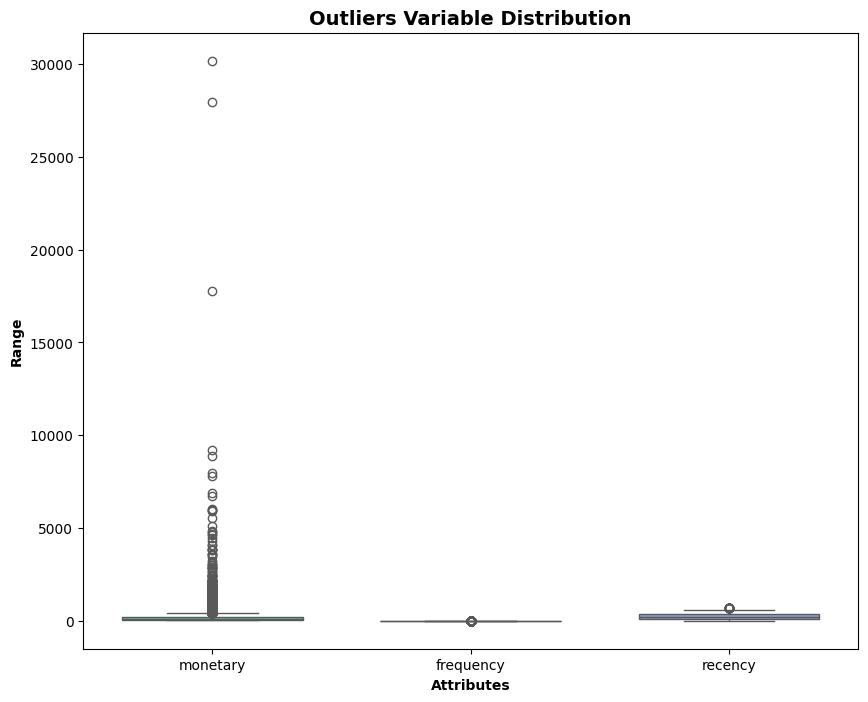

In [71]:
attributes = ['monetary','frequency','recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm_iqr[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

**IQR**

In [72]:
# Note for normal distribution

from pandas.core.reshape.encoding import DataFrame
# Removing (statistical) outliers for monetary
rfm_features=['monetary']
def iqr_outlier (df:DataFrame,ft:list):
  for i in ft:
    Q1 = df[i].quantile(.25)
    Q3 = df[i].quantile(.75)
    IQR = Q3 - Q1
    df = df[(df[i] < Q1 - 1.5*IQR) | (df[i] > Q3 + 1.5*IQR)]
  return df

In [73]:
rfm_i = pd.DataFrame()
rfm_i['monetary']=iqr_outlier(rfm_df_outlier, rfm_features)['monetary']
display(rfm_i)

monetary
25396    437.56
86509    417.16
53338    427.48
88527   1097.17
16069    541.96
...         ...
63919    990.87
55824    916.02
66893    712.29
91707    964.50
29868    800.40

[969 rows x 1 columns]

**Z-score**

In [74]:
rfm_zs= pd.DataFrame#rfm_df_outlier.copy()
rfm_features=['monetary']


def zscore_outliers(df:DataFrame,ft:list, threshold):

    for col in ft:
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        # Identify outliers based on threshold
        outliers = pd.DataFrame(df[col][abs(z_scores) > threshold])


    return outliers
rfm_zs=zscore_outliers(rfm_df_outlier,rfm_features,3)
display(rfm_zs)

monetary
81296   2002.68
57951  17786.88
60601   2840.00
92220   2120.13
87506   7971.88
...         ...
43836   2606.01
59154   8891.00
256     4296.80
70654   6702.72
77451   2452.12

[68 rows x 1 columns]

**Filter outliers**

In [75]:
iqr = rfm_i.index.tolist()
zs = rfm_zs.index.tolist()
outliers = list(set(iqr) & set(zs))
display(len(outliers))

68

## Rescaling the Attributes

It is extremely important to rescale the variables so that they have a comparable scale.|
There are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [76]:
from sklearn.preprocessing import StandardScaler


In [77]:
# Rescaling the attributes

rfm = rfm_df[['monetary','frequency', 'recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled.shape

(10000, 3)

In [78]:
rfm_df_scaled = pd.DataFrame(rfm_scaled)
rfm_df_scaled.columns = ['monetary', 'frequency', 'recency']
rfm_df_scaled.head()

monetary  frequency   recency
0 -0.124105  -0.161208  0.329806
1 -0.314671  -0.161208 -0.376435
2 -0.284046  -0.161208  1.511276
3  0.386154  -0.161208 -1.359893
4 -0.282274  -0.161208 -0.937468

In [79]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [80]:
from yellowbrick.cluster import KElbowVisualizer

In [81]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Finding the Optimal Number of Clusters

#### Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

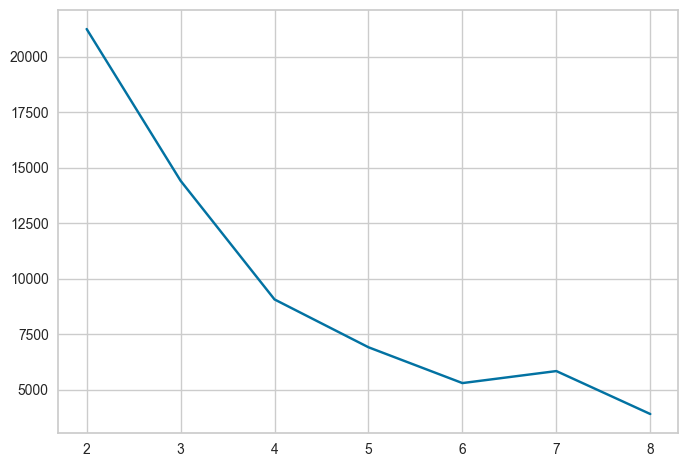

In [82]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_cluster
plt.plot(range_n_clusters, ssd)
plt.plot

Distorition score elbow để xác định số lượng cụm tối ưu

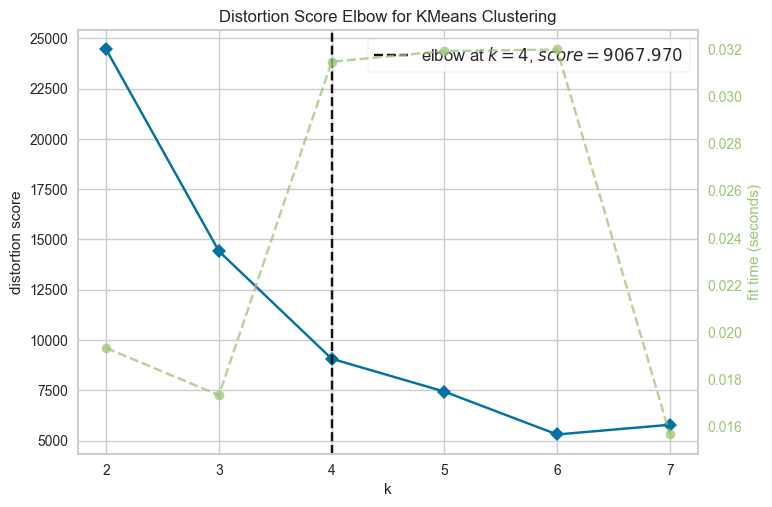

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
rfmk_means = KMeans()
elbow = KElbowVisualizer(rfmk_means, k=(2, 8))
elbow.fit(rfm_df_scaled)
elbow.show()

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1.

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [84]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))



For n_clusters=2, the silhouette score is 0.45469041662386617
For n_clusters=3, the silhouette score is 0.518965137558453
For n_clusters=4, the silhouette score is 0.5214181826137629
For n_clusters=5, the silhouette score is 0.4692914943871847
For n_clusters=6, the silhouette score is 0.4834455590714633
For n_clusters=7, the silhouette score is 0.48526673060030295
For n_clusters=8, the silhouette score is 0.43848468470183444


##KMeans

In [85]:
# Final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [86]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [87]:
# assign the label
rfm_df['clus_kmeans'] = kmeans.labels_
rfm_df.head()

customer_unique_id  recency  frequency  monetary  \
5866   0ffbd15f821fb05be0defae9728bc195      287          1    137.99   
90657  f8871d2a167b1a66c7489dbca6a77a8f      180          1     26.11   
42593  7492a411232f7dd4b1adb8b335cd1983      466          1     44.09   
25396  45803b22a4915496b505713dd352e779       31          1    437.56   
66807  b6fed6dcac8cbb66092059919d9b4017       95          1     45.13   

       clus_kmeans  
5866             1  
90657            0  
42593            1  
25396            0  
66807            0

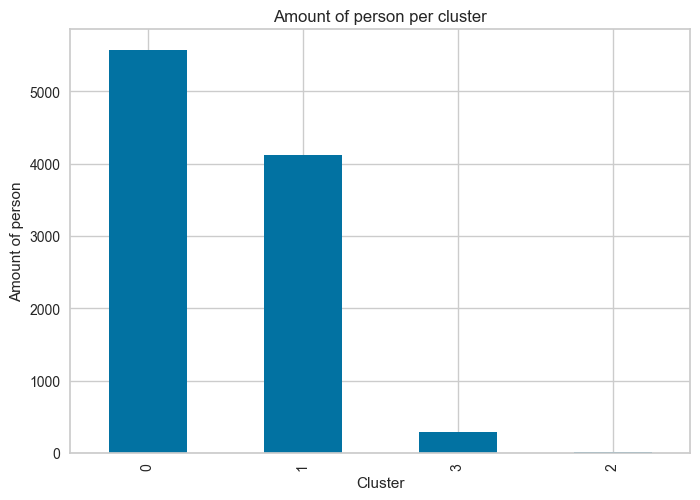

In [88]:
rfm_df['clus_kmeans'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of person')
plt.title('Amount of person per cluster')
plt.show()

<Axes: xlabel='clus_kmeans', ylabel='monetary'>

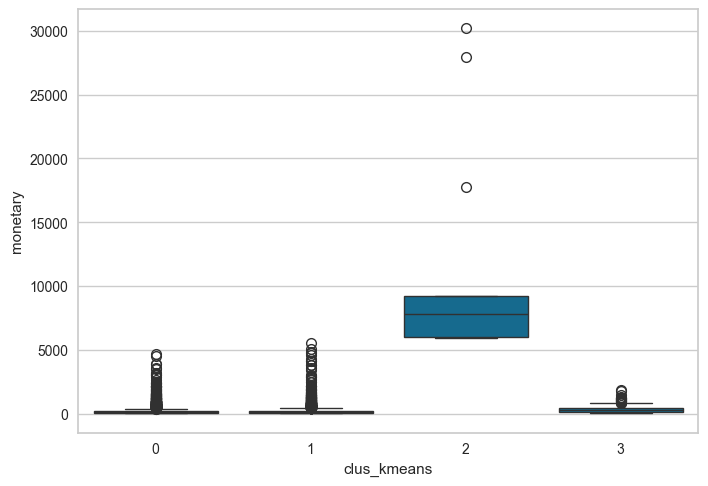

In [89]:
# Box plot to visualize Cluster Id vs monetary

sns.boxplot(x='clus_kmeans', y='monetary', data=rfm_df)


<Axes: xlabel='clus_kmeans', ylabel='frequency'>

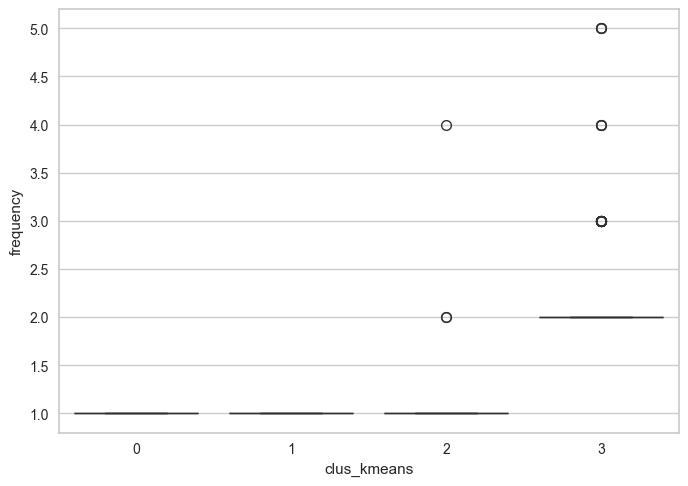

In [90]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='clus_kmeans', y='frequency', data=rfm_df)
#sns.jointplot(x='clus_kmeans',y='frequency',data=rfm_df,kind ='hist',color ='red')

<Axes: xlabel='clus_kmeans', ylabel='recency'>

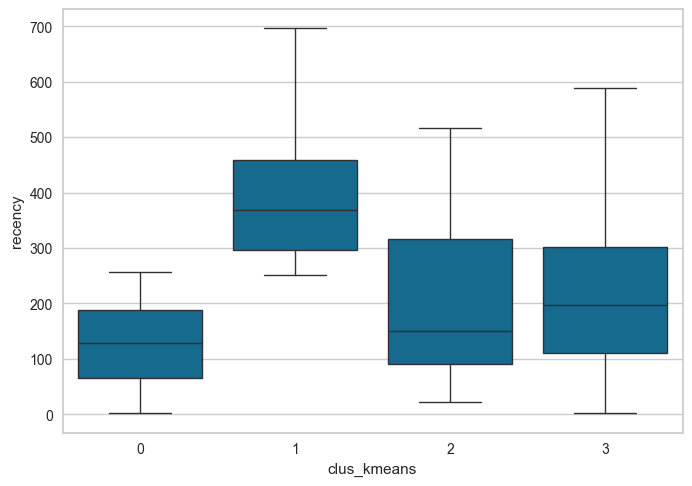

In [91]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='clus_kmeans', y='recency', data=rfm_df)


## Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,
- Divisive
- Agglomerative.

In [92]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

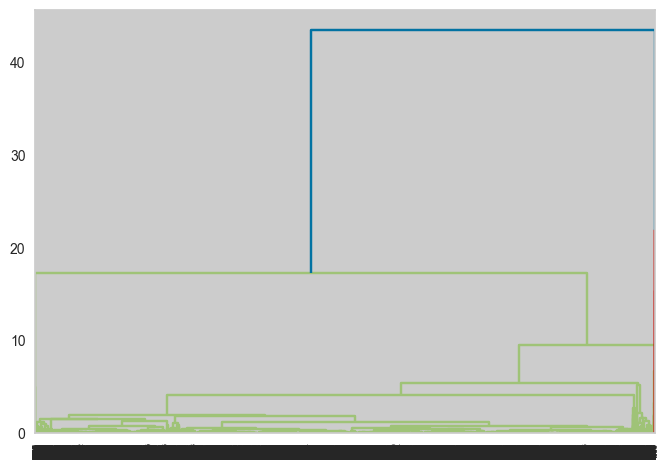

In [93]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Cutting the Dendrogram based on K

In [94]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
# Assign cluster labels

rfm_df['clus_hac'] = cluster_labels
rfm_df.head()

customer_unique_id  recency  frequency  monetary  \
5866   0ffbd15f821fb05be0defae9728bc195      287          1    137.99   
90657  f8871d2a167b1a66c7489dbca6a77a8f      180          1     26.11   
42593  7492a411232f7dd4b1adb8b335cd1983      466          1     44.09   
25396  45803b22a4915496b505713dd352e779       31          1    437.56   
66807  b6fed6dcac8cbb66092059919d9b4017       95          1     45.13   

       clus_kmeans  clus_hac  
5866             1         0  
90657            0         0  
42593            1         0  
25396            0         0  
66807            0         0

<Axes: xlabel='clus_hac', ylabel='monetary'>

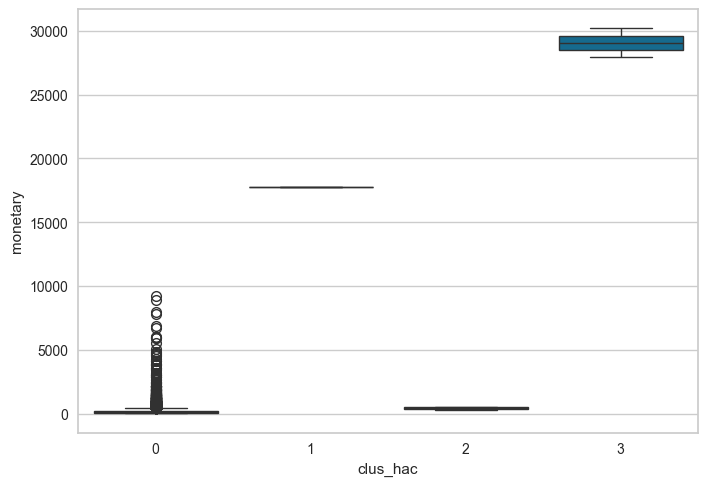

In [96]:
# Plot Cluster Id vs Amount

sns.boxplot(x='clus_hac', y='monetary', data=rfm_df)

<Axes: xlabel='clus_hac', ylabel='frequency'>

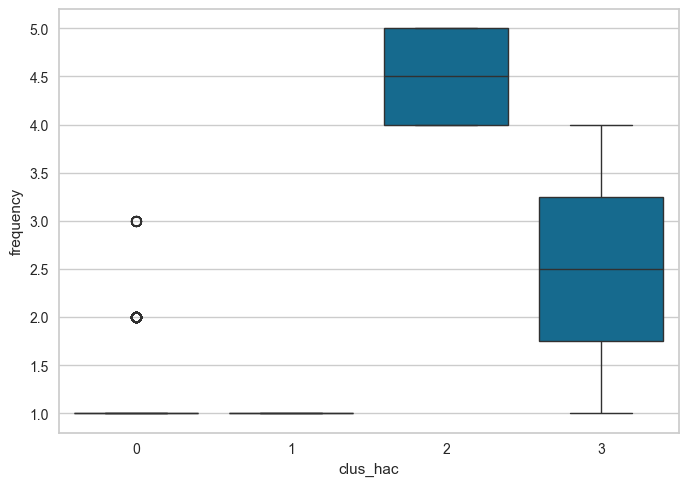

In [97]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='clus_hac', y='frequency', data=rfm_df)

<Axes: xlabel='clus_hac', ylabel='recency'>

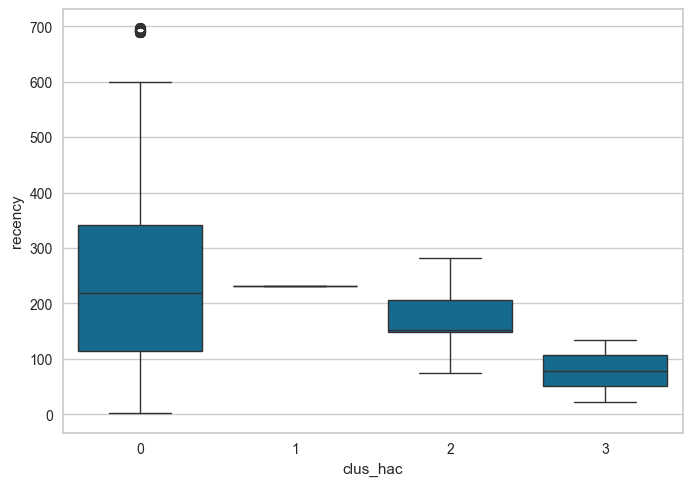

In [98]:
# Plot Cluster Id vs Recency

sns.boxplot(x='clus_hac', y='recency', data=rfm_df)

In [99]:
rfm_df.to_csv('rfmclus.csv', index=False)

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [101]:
# Define Autoencoder model
input_dim = rfm_df_scaled.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

In [102]:
# Train Autoencoder model
autoencoder.fit(rfm_df_scaled, rfm_df_scaled, epochs=50, batch_size=32)

# Use Autoencoder to encode data
encoder = Model(inputs=input_layer, outputs=encoder)
encoded_data = encoder.predict(rfm_df_scaled)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0309
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8822
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9506
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8166
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8671
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7544
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8373
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1751
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7625
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6164
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6585
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5753
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9766
Epoch 14/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6943
Epoch 15/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [103]:


# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(encoded_data)

# Assign cluster labels to original data
rfm_df['clus_autoencoder'] = kmeans.labels_
print(rfm_df)


                     customer_unique_id  recency  frequency  monetary  \
5866   0ffbd15f821fb05be0defae9728bc195      287          1    137.99   
90657  f8871d2a167b1a66c7489dbca6a77a8f      180          1     26.11   
42593  7492a411232f7dd4b1adb8b335cd1983      466          1     44.09   
25396  45803b22a4915496b505713dd352e779       31          1    437.56   
66807  b6fed6dcac8cbb66092059919d9b4017       95          1     45.13   
...                                 ...      ...        ...       ...   
33964  5cc97f5eb1aaa36fc039a20913e82ad6      287          1    321.58   
17897  30e61dd5c4108f769b90121c2ecd596f       69          1     19.89   
93313  ffec490ab531184a483efe2eedd68908       28          1     57.98   
91707  fb8038205a1b4f9a90cb981e074e9be2      193          1    964.50   
29868  51c3c1f2163c5e5a546e0478cbe00c57        8          1    800.40   

       clus_kmeans  clus_hac  clus_autoencoder  
5866             1         0                 3  
90657            0       

<Axes: xlabel='clus_autoencoder', ylabel='monetary'>

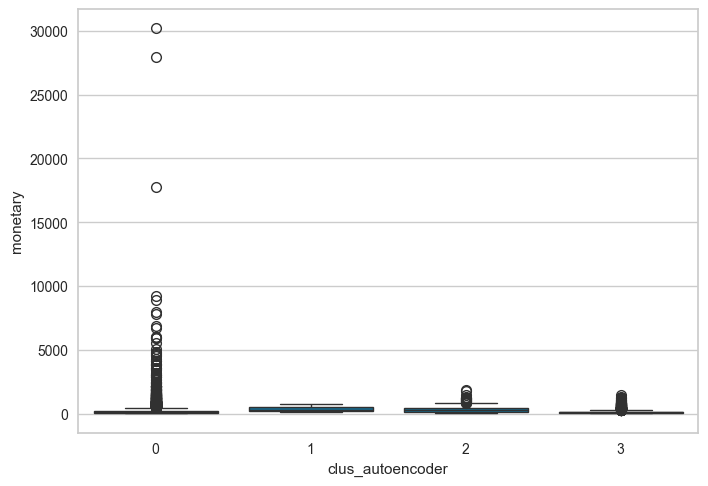

In [104]:
# Plot Cluster Id vs Amount

sns.boxplot(x='clus_autoencoder', y='monetary', data=rfm_df)

<Axes: xlabel='clus_autoencoder', ylabel='frequency'>

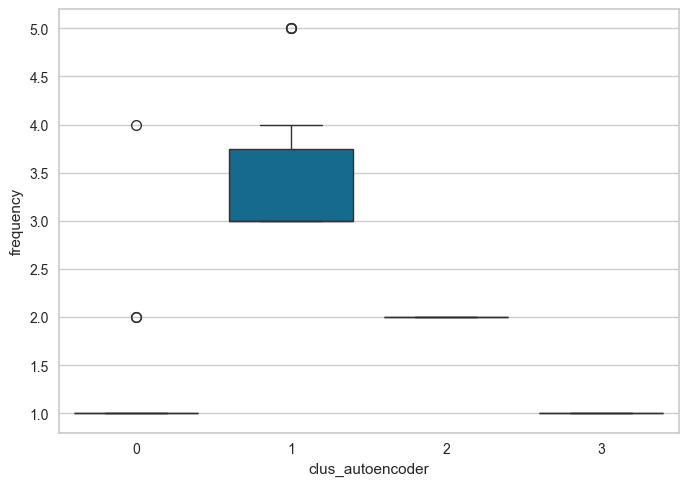

In [105]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='clus_autoencoder', y='frequency', data=rfm_df)

<Axes: xlabel='clus_autoencoder', ylabel='recency'>

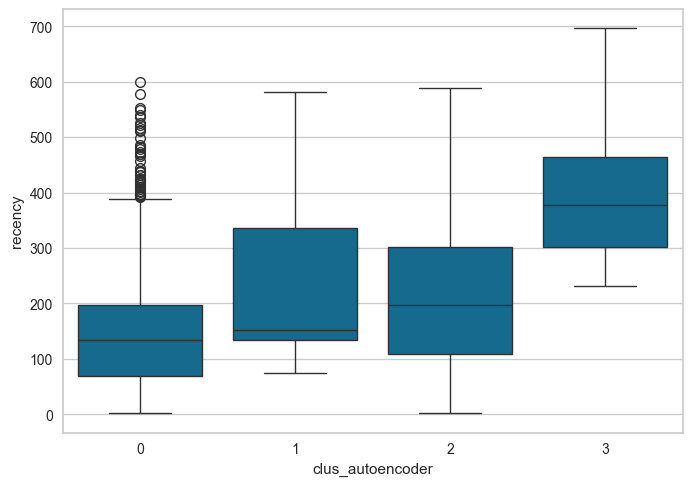

In [106]:
# Plot Cluster Id vs Recency

sns.boxplot(x='clus_autoencoder', y='recency', data=rfm_df)

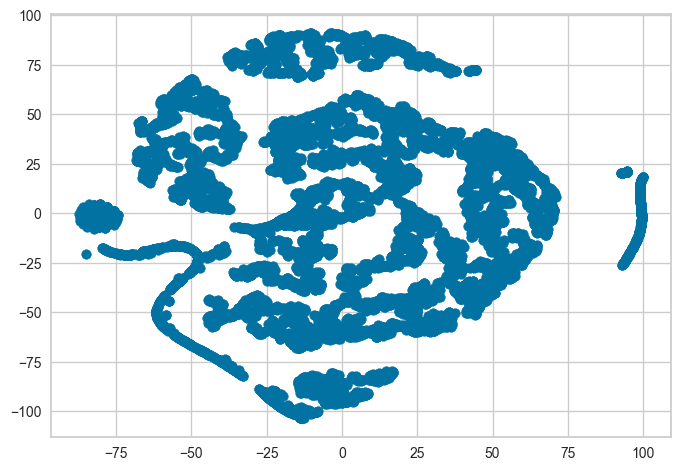

In [107]:
# Visualize clustering using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_data = tsne.fit_transform(encoded_data)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

## Model Validation

In [108]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score




In [109]:
# Reconstruction Error
reconstruction_error = autoencoder.evaluate(rfm_df_scaled, rfm_df_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8509


In [110]:
# Silhouette Score
silhouette = silhouette_score(encoded_data, kmeans.labels_)
print(silhouette)

0.56748766


In [111]:
# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(encoded_data, kmeans.labels_)
print(calinski_harabasz)

27386.58


##Omit outliers

In [112]:
outlier_rm = rfm_df_outlier.drop(outliers)

In [113]:
outlier_rm

customer_unique_id  recency  frequency  monetary
5866   0ffbd15f821fb05be0defae9728bc195      287          1    137.99
90657  f8871d2a167b1a66c7489dbca6a77a8f      180          1     26.11
42593  7492a411232f7dd4b1adb8b335cd1983      466          1     44.09
25396  45803b22a4915496b505713dd352e779       31          1    437.56
66807  b6fed6dcac8cbb66092059919d9b4017       95          1     45.13
...                                 ...      ...        ...       ...
33964  5cc97f5eb1aaa36fc039a20913e82ad6      287          1    321.58
17897  30e61dd5c4108f769b90121c2ecd596f       69          1     19.89
93313  ffec490ab531184a483efe2eedd68908       28          1     57.98
91707  fb8038205a1b4f9a90cb981e074e9be2      193          1    964.50
29868  51c3c1f2163c5e5a546e0478cbe00c57        8          1    800.40

[9932 rows x 4 columns]

## Rescaling the Attributes

In [114]:
from sklearn.preprocessing import StandardScaler


In [115]:
# Rescaling the attributes

rfm_df_outlier = outlier_rm[['monetary', 'frequency', 'recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_scaled_outlier = scaler.fit_transform(rfm_df_outlier)
rfm_scaled_outlier.shape

(9932, 3)

In [116]:
rfm_df_outlier_scaled = pd.DataFrame(rfm_scaled_outlier)
rfm_df_outlier_scaled.columns = ['monetary', 'frequency', 'recency']
rfm_df_outlier_scaled.head()

monetary  frequency   recency
0 -0.193414  -0.161419  0.329433
1 -0.699017  -0.161419 -0.376661
2 -0.617763  -0.161419  1.510656
3  1.160390  -0.161419 -1.359914
4 -0.613063  -0.161419 -0.937577

##Finding the Optimal Number of Clusters

In [117]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

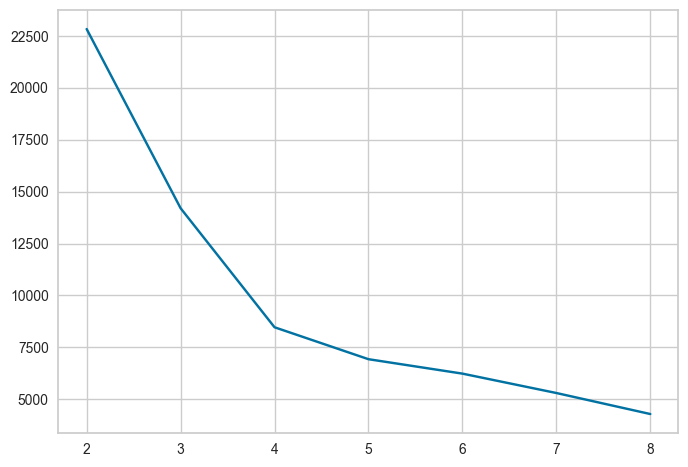

In [118]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_outlier_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd)
plt.plot

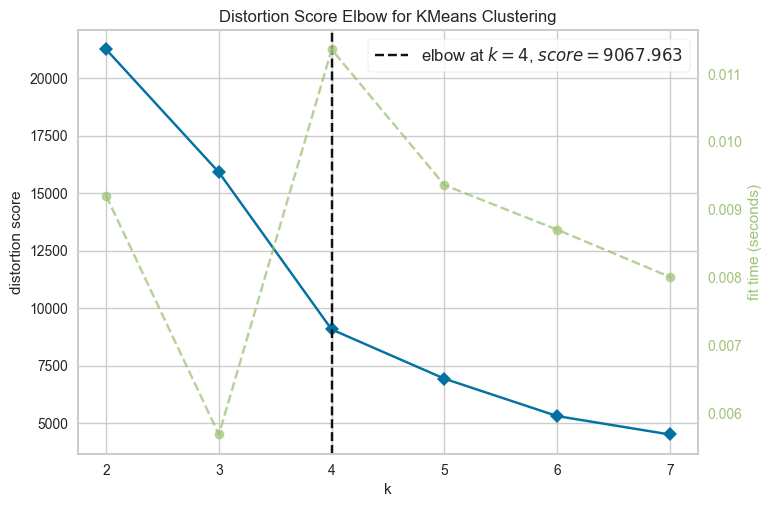

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
from yellowbrick.cluster import KElbowVisualizer
rfmk_means = KMeans()
elbow = KElbowVisualizer(rfmk_means, k=(2, 8))
elbow.fit(rfm_df_scaled)
elbow.show()

In [120]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_outlier_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_outlier_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))



For n_clusters=2, the silhouette score is 0.39356589672355574
For n_clusters=3, the silhouette score is 0.4289816009433041
For n_clusters=4, the silhouette score is 0.4805103089051806
For n_clusters=5, the silhouette score is 0.4807500842702313
For n_clusters=6, the silhouette score is 0.34530430668590667
For n_clusters=7, the silhouette score is 0.4135545400504104
For n_clusters=8, the silhouette score is 0.44032582450130414


##KMeans

In [121]:
# Final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_outlier_scaled)

KMeans(max_iter=50, n_clusters=4)

In [122]:
kmeans.labels_

array([0, 1, 0, ..., 1, 3, 3], dtype=int32)

In [123]:
# assign the label
outlier_rm['clus_kmeans'] = kmeans.labels_


In [124]:
outlier_rm

customer_unique_id  recency  frequency  monetary  \
5866   0ffbd15f821fb05be0defae9728bc195      287          1    137.99   
90657  f8871d2a167b1a66c7489dbca6a77a8f      180          1     26.11   
42593  7492a411232f7dd4b1adb8b335cd1983      466          1     44.09   
25396  45803b22a4915496b505713dd352e779       31          1    437.56   
66807  b6fed6dcac8cbb66092059919d9b4017       95          1     45.13   
...                                 ...      ...        ...       ...   
33964  5cc97f5eb1aaa36fc039a20913e82ad6      287          1    321.58   
17897  30e61dd5c4108f769b90121c2ecd596f       69          1     19.89   
93313  ffec490ab531184a483efe2eedd68908       28          1     57.98   
91707  fb8038205a1b4f9a90cb981e074e9be2      193          1    964.50   
29868  51c3c1f2163c5e5a546e0478cbe00c57        8          1    800.40   

       clus_kmeans  
5866             0  
90657            1  
42593            0  
25396            1  
66807            1  
...            ...  
33964            0  
17897            1  
93313            1  
91707            3  
29868            3  

[9932 rows x 5 columns]

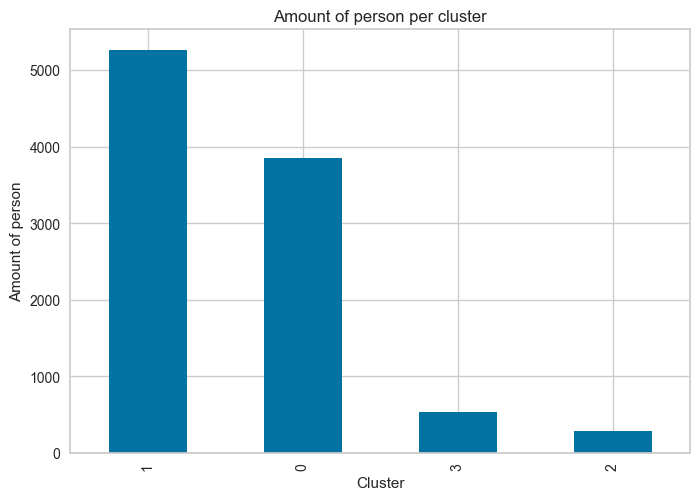

In [125]:
outlier_rm['clus_kmeans'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of person')
plt.title('Amount of person per cluster')
plt.show()

## Hierarchical Clustering

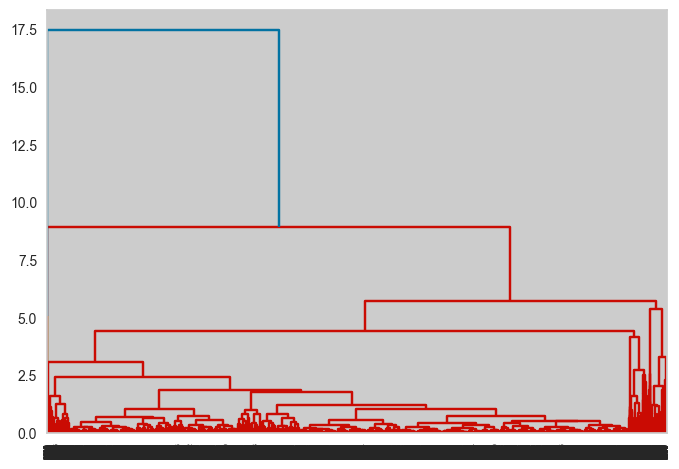

In [126]:
# Average linkage

mergings = linkage(rfm_df_outlier_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [127]:
#4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [128]:
# Assign cluster labels

outlier_rm ['clus_hac'] = cluster_labels
outlier_rm .head()

customer_unique_id  recency  frequency  monetary  \
5866   0ffbd15f821fb05be0defae9728bc195      287          1    137.99   
90657  f8871d2a167b1a66c7489dbca6a77a8f      180          1     26.11   
42593  7492a411232f7dd4b1adb8b335cd1983      466          1     44.09   
25396  45803b22a4915496b505713dd352e779       31          1    437.56   
66807  b6fed6dcac8cbb66092059919d9b4017       95          1     45.13   

       clus_kmeans  clus_hac  
5866             0         0  
90657            1         0  
42593            0         0  
25396            1         0  
66807            1         0

## Autoencoder

In [129]:
# Define Autoencoder model
input_dim_outlier = rfm_df_outlier_scaled.shape[1]
encoding_dim_outlier = 2

input_layer_outlier = Input(shape=(input_dim_outlier,))
encoder_outlier = Dense(encoding_dim_outlier, activation='relu')(input_layer_outlier)
decoder_outlier = Dense(input_dim_outlier, activation='sigmoid')(encoder_outlier)

autoencoder_outlier = Model(inputs=input_layer_outlier, outputs=decoder_outlier)
autoencoder_outlier.compile(optimizer='adam', loss='mse')

In [130]:
# Train Autoencoder model
autoencoder_outlier.fit(rfm_df_outlier_scaled, rfm_df_outlier_scaled, epochs=50, batch_size=32)

# Use Autoencoder to encode data
encoder_outlier = Model(inputs=input_layer_outlier, outputs=encoder_outlier)
encoded_data_outlier = encoder.predict(rfm_df_outlier_scaled)

Epoch 1/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2346
Epoch 2/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0747
Epoch 3/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9543
Epoch 4/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8711
Epoch 5/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8716
Epoch 6/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8890
Epoch 7/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8104
Epoch 8/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9061
Epoch 9/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8214
Epoch 10/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7759
Epoch 11/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8409
Epoch 12/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7754
Epoch 13/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7641
Epoch 14/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7561
Epoch 15/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [131]:
outlier_rm

customer_unique_id  recency  frequency  monetary  \
5866   0ffbd15f821fb05be0defae9728bc195      287          1    137.99   
90657  f8871d2a167b1a66c7489dbca6a77a8f      180          1     26.11   
42593  7492a411232f7dd4b1adb8b335cd1983      466          1     44.09   
25396  45803b22a4915496b505713dd352e779       31          1    437.56   
66807  b6fed6dcac8cbb66092059919d9b4017       95          1     45.13   
...                                 ...      ...        ...       ...   
33964  5cc97f5eb1aaa36fc039a20913e82ad6      287          1    321.58   
17897  30e61dd5c4108f769b90121c2ecd596f       69          1     19.89   
93313  ffec490ab531184a483efe2eedd68908       28          1     57.98   
91707  fb8038205a1b4f9a90cb981e074e9be2      193          1    964.50   
29868  51c3c1f2163c5e5a546e0478cbe00c57        8          1    800.40   

       clus_kmeans  clus_hac  
5866             0         0  
90657            1         0  
42593            0         0  
25396            1         0  
66807            1         0  
...            ...       ...  
33964            0         0  
17897            1         0  
93313            1         0  
91707            3         0  
29868            3         0  

[9932 rows x 6 columns]

In [132]:

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(encoded_data_outlier)

# Assign cluster labels to original data
outlier_rm['clus_autoencoder'] = kmeans.labels_
print(outlier_rm)


                     customer_unique_id  recency  frequency  monetary  \
5866   0ffbd15f821fb05be0defae9728bc195      287          1    137.99   
90657  f8871d2a167b1a66c7489dbca6a77a8f      180          1     26.11   
42593  7492a411232f7dd4b1adb8b335cd1983      466          1     44.09   
25396  45803b22a4915496b505713dd352e779       31          1    437.56   
66807  b6fed6dcac8cbb66092059919d9b4017       95          1     45.13   
...                                 ...      ...        ...       ...   
33964  5cc97f5eb1aaa36fc039a20913e82ad6      287          1    321.58   
17897  30e61dd5c4108f769b90121c2ecd596f       69          1     19.89   
93313  ffec490ab531184a483efe2eedd68908       28          1     57.98   
91707  fb8038205a1b4f9a90cb981e074e9be2      193          1    964.50   
29868  51c3c1f2163c5e5a546e0478cbe00c57        8          1    800.40   

       clus_kmeans  clus_hac  clus_autoencoder  
5866             0         0                 0  
90657            1       

##Model Validation

In [133]:
# Calinski-Harabasz Index
calinski_harabasz_outlier = calinski_harabasz_score(encoded_data_outlier, kmeans.labels_)
print(calinski_harabasz_outlier)

15144.264


In [134]:
# Reconstruction Error
reconstruction_error_outlier = autoencoder.evaluate(rfm_df_outlier_scaled, rfm_df_outlier_scaled)
reconstruction_error_outlier

311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6561


0.6326849460601807

<Axes: xlabel='clus_autoencoder', ylabel='monetary'>

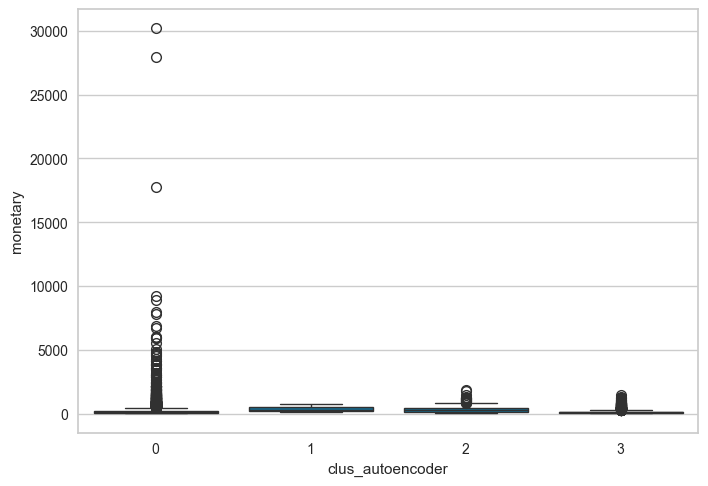

In [135]:
# Plot Cluster Id vs Amount

sns.boxplot(x='clus_autoencoder', y='monetary', data=rfm_df)

<Axes: xlabel='clus_autoencoder', ylabel='frequency'>

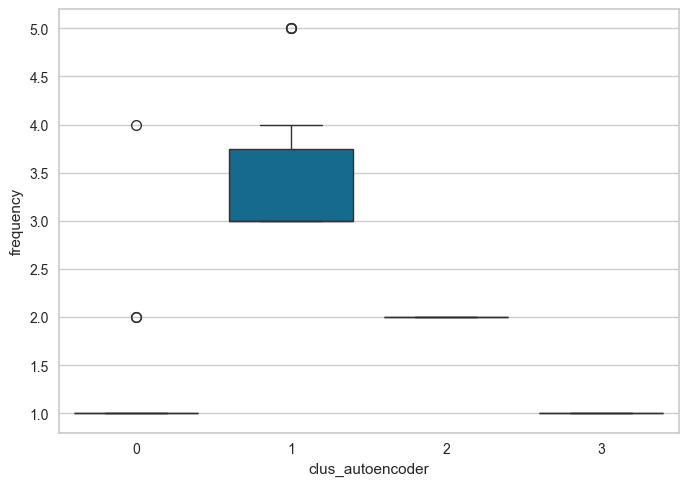

In [136]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='clus_autoencoder', y='frequency', data=rfm_df)

<Axes: xlabel='clus_autoencoder', ylabel='recency'>

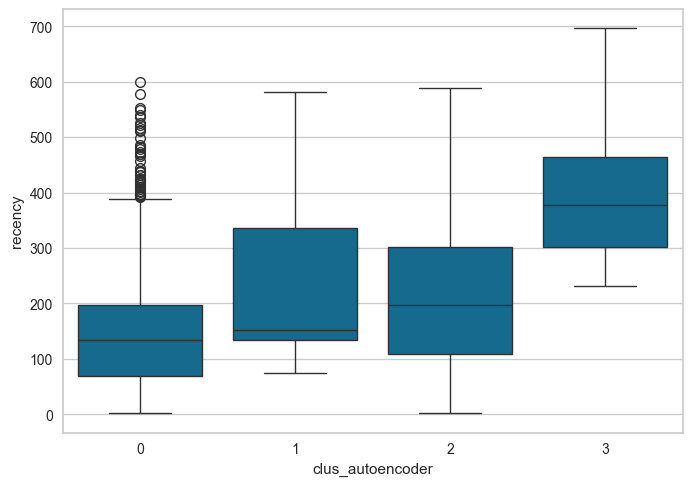

In [137]:
# Plot Cluster Id vs Recency

sns.boxplot(x='clus_autoencoder', y='recency', data=rfm_df)

In [138]:

# Silhouette Score
silhouette_outlier = silhouette_score(encoded_data_outlier, kmeans.labels_)
print(silhouette_outlier)

0.45419124


#Evaluate 2 circumstances

In [139]:
arr=np.array([[reconstruction_error,silhouette,calinski_harabasz],[reconstruction_error_outlier,silhouette_outlier,calinski_harabasz_outlier]])

In [140]:
evaluate=pd.DataFrame(arr,columns=['reconstruction_error','silhoutte','calinski_harabasz'],index=['outlier','no outlier'])

In [141]:
print(evaluate)

            reconstruction_error  silhoutte  calinski_harabasz
outlier                 0.695605   0.567488       27386.580078
no outlier              0.632685   0.454191       15144.263672


In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [143]:
evaluater=pd.read_csv('rfm_dataframe.csv')

In [144]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, fowlkes_mallows_score

clus_dbscan
 0    9606
 1     244
-1     124
 2      26
Name: count, dtype: int64


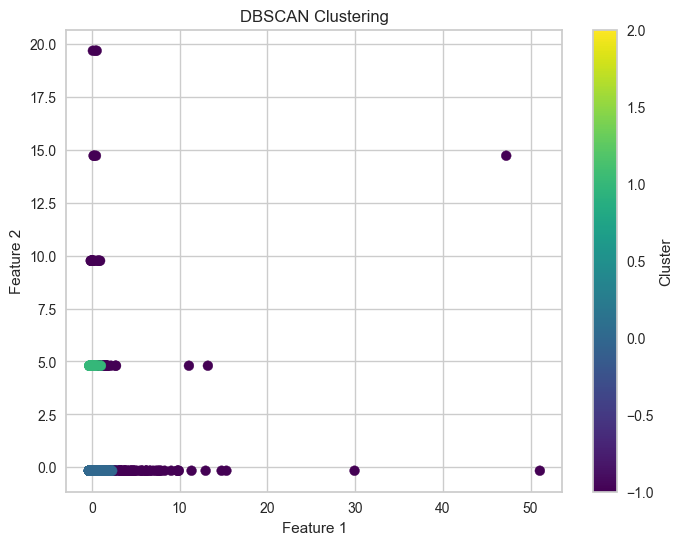

Silhouette Score: 0.6396749005981859


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


# DBSCAN parameters
eps = 0.5
min_samples = 15

# DBSCAN Clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
rfm_df_scaled['clus_dbscan'] = dbscan.fit_predict(rfm_df_scaled)

# Show the clustering results
print(rfm_df_scaled['clus_dbscan'].value_counts())  # Shows the number of points in each cluster
plt.figure(figsize=(8, 6))

# Plot the clusters
plt.scatter(rfm_df_scaled.iloc[:, 0], rfm_df_scaled.iloc[:, 1], c=rfm_df_scaled['clus_dbscan'], cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# Evaluate with Silhouette Score (not applicable to noise points, so ignore them)
valid_clusters = rfm_df_scaled['clus_dbscan'] != -1
silhouette_avg = silhouette_score(rfm_df_scaled[valid_clusters], rfm_df_scaled.loc[valid_clusters, 'clus_dbscan'])
print(f"Silhouette Score: {silhouette_avg}")


**DEC**

In [146]:
!pip install tensorflow matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import tensorflow as tf

# Fix seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define model
input_dim = rfm_df_scaled.shape[1]
encoding_dim = 10  # Higher latent space dimensionality

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dropout(0.2)(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Compile and train autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')
autoencoder.fit(rfm_df_scaled, rfm_df_scaled, epochs=50, batch_size=32, verbose=1)

# Extract latent space
encoder_model = Model(inputs=input_layer, outputs=encoded)
encoded_data = encoder_model.predict(rfm_df_scaled)

# Perform clustering
kmeans = KMeans(n_clusters=4, n_init=50, random_state=42)
kmeans.fit(encoded_data)
rfm_df['clus_dec'] = kmeans.labels_

# Evaluate clustering
silhouette_avg = silhouette_score(encoded_data, kmeans.labels_)
print(f"Silhouette Score for DEC: {silhouette_avg}")


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: -5734.3091
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -2836127.7500
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -79862312.0000
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -660770368.0000
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -2949086720.0000
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -9257821184.0000
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -23092539392.0000
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -49466466304.0000
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -94500315136.0000
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -165918228480.0000
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -271654027264.0000
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: -424357789696.0000
Epoch 13/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: -632834162688.0